In [6]:
import matplotlib.pyplot as plt

In [7]:
from skimage.feature import hog

In [8]:
from skimage import data,exposure

In [9]:
import cv2

In [33]:
image= cv2.imread("C:\\Users\\TEMP\\photo1.jpg")

In [34]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

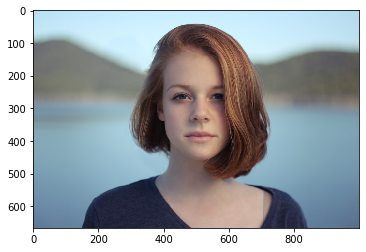

In [35]:
plt.imshow(image)

In [36]:
%matplotlib inline

In [37]:
fd,hg_img=hog(image,orientations=8, pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

In [43]:
cascPath = "C:\\haarcascade_frontalface_default.xml"

In [44]:
faceCascade = cv2.CascadeClassifier(cascPath)

In [45]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [46]:
faces = faceCascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags = cv2.CASCADE_SCALE_IMAGE
)

In [47]:
print(image.shape)

(667, 1000, 3)


In [48]:
print("Found {0} faces!".format(len(faces)))

Found 1 faces!


In [49]:
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

In [ ]:
cv2.imshow("Faces found", image)
cv2.waitKey(0)

In [53]:
import face_recognition

In [54]:
import matplotlib.pyplot as plt

In [55]:
from matplotlib.patches import Rectangle

In [56]:
from matplotlib.patches import Circle

In [57]:
image=cv2.imread("C:\\Users\\TEMP\\alia bhatt.jpg")

In [58]:
#to find all the faces and number of faces
face_locations= face_recognition.face_locations(image)

In [59]:
print("Found {0} faces!".format(len(face_locations)))

Found 1 faces!


In [62]:
photo1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

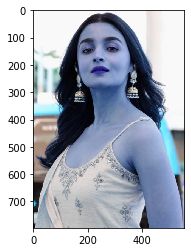

In [63]:
plt.imshow(image)

In [64]:
image=cv2.imread("C:\\Users\\TEMP\\Hrithik 1.jpg")

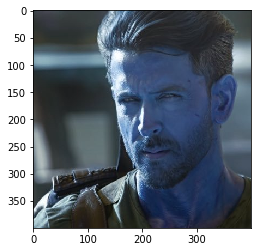

In [65]:
plt.imshow(image)

In [66]:
hrithik_1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [67]:
image=cv2.imread("C:\\Users\\TEMP\\chloe.jpg")

In [68]:
chloe=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

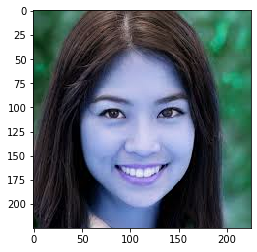

In [69]:
plt.imshow(image)

In [70]:
#face encoding
photo1_encoding=face_recognition.face_encodings(photo1)[0]
hrithik_1_encoding=face_recognition.face_encodings(hrithik_1)[0]
chloe_encoding=face_recognition.face_encodings(chloe)[0]

In [71]:
#creating database
known_face_encodings=[
    photo1_encoding,
    hrithik_1_encoding,
    chloe_encoding
]

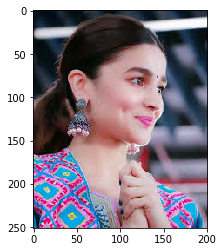

In [72]:
#getting unknown image we want to predict
image=cv2.imread("C:\\Users\\TEMP\\alia bhatt1.jpg")
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

In [73]:
#getting face_encoding of unknown image
unknown_image_encodings= face_recognition.face_encodings(unknown_image)

In [74]:
from scipy.spatial import distance
import numpy as np

In [75]:
#for more than 1 unknown face
for unknown_image_encoding in unknown_image_encodings:
    result=[]
    for known_face_encoding in known_face_encodings:
        d= distance.euclidean(known_face_encoding, unknown_image_encoding)
        print(d)
        result.append(d)
    threshold=0.6
    results=np.array(result)<=threshold
    name= "unknown face"
    if results[0]:
        name="Alia bhatt"
    elif results[1]:
        name="Hrithik roshan"
    elif results[2]:
        name="chloe"
    print(f"found {name} in the photo!")

0.4922457670765025
0.8332602321082482
0.784790473744445
found Alia bhatt in the photo!


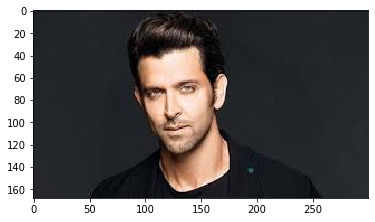

In [89]:
#Another example for prediction
image=cv2.imread("C:\\Users\\TEMP\\hrithik2.jpg")
unknown_image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

In [90]:
#getting face_encoding of unknown image
unknown_face_encodings= face_recognition.face_encodings(unknown_image)
from scipy.spatial import distance
import numpy as np
for unknown_face_encoding in unknown_face_encodings:
    result=[]
    for known_face_encoding in known_face_encodings:
        d= distance.euclidean(known_face_encoding, unknown_face_encoding)
        print(d)
        result.append(d)
    threshold=0.68
    results=np.array(result)<= threshold
    name= "unknown face"
    if results[0]:
        name="Alia bhatt"
    elif results[1]:
        name="Hrithik roshan"
    elif results[2]:
        name="chloe"
    print(f"found {name} in the photo!")

0.8811583138112951
0.6434616467483871
1.0284319884372364
found Hrithik roshan in the photo!
